# **Task 1**

### Import libraries and functions

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from cleantext import clean
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import ast

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [1]:
# Run these lines if you have not installed nltk

#import nltk
#nltk.download('all')

In [3]:
# Import our preprocessing functions
from preprocessingFunctions import clean_text, tokenize, removeStopWords, stemming

### Load data as dataframe

In [4]:
corpusSample = pd.read_csv("fakenewscorpus_data/250_rows.csv")

### Clean ```content``` variable

In [5]:
content_sample_cleaned = corpusSample['content'].apply(clean_text) 

### Tokenize ```content``` variable

In [6]:
content_sample_tokenized = content_sample_cleaned.apply(tokenize)

### Remove stop words from `content` variable

In [7]:
content_sample_no_stop_words = content_sample_tokenized.apply(removeStopWords)

### Perform stemming on ```content``` variable

In [8]:
content_sample_stemmed = content_sample_no_stop_words.apply(stemming)

### Reduction rates

In [9]:
# Using FreqDist() we can see the vocabulary as well as the frequence of each token
tokens_after_tokenization = [x.strip("'") for l in content_sample_tokenized for x in l]
tokens_after_tokenization_vocab = FreqDist(tokens_after_tokenization)

tokens_after_removing_stop_words = [x.strip("'") for l in content_sample_no_stop_words for x in l]
tokens_after_removing_stop_words_vocab = FreqDist(tokens_after_removing_stop_words)

tokens_after_stemming = [x.strip("'") for l in content_sample_stemmed for x in l]
tokens_after_stemming_vocab = FreqDist(tokens_after_stemming)

print(f"Size of vocabulary after tokenization: {len(tokens_after_tokenization_vocab)}\n")

print(f"Size of vocabulary after removal of stop words: {len(tokens_after_removing_stop_words_vocab)}\n")

print(f"Size of vocabulary after stemming: {len(tokens_after_stemming_vocab)}\n")

print(f"Reduction rate of the vocabulary size after removing stopwords: {round((len(tokens_after_tokenization_vocab)
                                    - len(tokens_after_removing_stop_words_vocab)) / 
                                    len(tokens_after_tokenization_vocab) * 100, 2)}\n")

print(f"Reduction rate of the vocabulary size after stemming: {round((len(tokens_after_removing_stop_words_vocab)
                                    - len(tokens_after_stemming_vocab)) / 
                                    len(tokens_after_removing_stop_words_vocab) * 100, 2)}\n")

Size of vocabulary after tokenization: 16887

Size of vocabulary after removal of stop words: 16752

Size of vocabulary after stemming: 11590

Reduction rate of the vocabulary size after removing stopwords: 0.8

Reduction rate of the vocabulary size after stemming: 30.81



In [ ]:
# Add preprocessed 'corpus' variable to corpus sample:
corpusSamplePreprocessed = corpusSample
corpusSamplePreprocessed['content'] = content_sample_stemmed

# **Task 2**

### Initial clean up: Remove non-relevant features, remove rows with invalid values and remove row duplicates

In [ ]:
# Load data as data frame. Load either full corpus or sample with 15,000 rows.

corpus = pd.read_csv("fakenewscorpus_data/995,000_rows.csv")
#corpus = pd.read_csv("fakenewscorpus_data/15,000_rows.csv")

In [ ]:
# Keep only potentially usefull features
corpus = corpus[['domain','type', 'scraped_at', 'content', 'title', 'authors', 'meta_description']]

In [ ]:
# Remove data points where 'type' is '2018-02-10 13:43:39.521661', since
# this type is not classifiable as fake/reliable
corpus = corpus.drop(corpus[corpus['type'] == '2018-02-10 13:43:39.521661'].index)

In [ ]:
# Remove data points where 'type' is 'unknown', since this type is not 
# classifiable as fake/reliable
corpus = corpus.drop(corpus[corpus['type'] == 'unknown'].index)

In [ ]:
# Remove articles written in russian, french or dutch
corpus = corpus.drop(corpus[corpus['domain'] == 'pravda.ru'].index)
corpus = corpus.drop(corpus[corpus['domain'] == 'legorafi.fr'].index)
corpus = corpus.drop(corpus[corpus['domain'] == 'speld.nl'].index)

In [ ]:
# Remove data points where either 'type' or 'content' is NaN
corpus = corpus[corpus['type'].notna() & corpus['content'].notna()]

In [ ]:
# Remove duplicates - there are 66.232 duplicated rows in full dataset.
corpus = corpus.drop_duplicates()

### Preprocessing: Clean, tokenize, remove stop words and perform stemming

In [ ]:
# Clean 'content' and save data frame as .csv file
corpus['content'] = corpus['content'].apply(clean_text)
# corpus.to_csv('corpus_cleaned.csv', index=False)

In [ ]:
# Tokenize 'content' and save data frame as .csv file
corpus['content'] = corpus['content'].apply(tokenize)
# corpus.to_csv('corpus_tokenized.csv', index=False)

In [ ]:
# Remove stop words from 'content' and save data frame as .csv file
corpus['content'] = corpus['content'].apply(removeStopWords)
# corpus.to_csv('corpus_no_stop_words.csv', index=False)

In [ ]:
# Perform stemming on 'content' and save data frame as .csv file
corpus['content'] = corpus['content'].apply(stemming)
corpus.to_csv('fakenewscorpus_data/995,000_rows_preprocessed.csv', index=False)
#corpus.to_csv('fakenewscorpus_data/15,000_rows_preprocessed.csv', index=False)

# Task 3 - exploring preprocessed dataset

In [5]:
# Load preprocessed corpus (if you want to skip the preprocessing steps above).
# Load either full preprocessed dataset or the preprocessed sample with 15,000 rows.

#corpus = pd.read_csv("fakenewscorpus_data/15,000_rows_preprocessed.csv")
corpus = pd.read_csv("fakenewscorpus_data/995,000_rows_preprocessed.csv")

In [6]:
# After loading the .csv file as dataframe remember to convert the data type of 
# 'content' from string back to list:

corpus['content'] = corpus['content'].apply(ast.literal_eval)

### Looking into 'domain'

In [7]:
print(f"Number of unique values in 'domain': {len(set(corpus['domain']))}")

Number of unique values in 'domain': 555


In [8]:
# Here we see that all texts from a particular domain is of the same type
boolian_value = True
for x in set(corpus['domain']):
    df_subset = corpus[corpus["domain"] == x]
    if(len(set(df_subset['type']))) != 1:
        print(x)
        boolian_value = False

if boolian_value:
    print("All texts from a particular domain is of the same type!")

All texts from a particular domain is of the same type!


In [9]:
# Here is the number of news texts for each domain
counts_domain = corpus['domain'].value_counts()
counts_domain_df = counts_domain.rename_axis('unique_values').reset_index(name='counts')

# The domains with the most articles
print(f"The 10 domains with the most articles:\n{counts_domain_df[0:10]}\n")

# The domains with the fewest articles
print(f"The 10 domains with the fewest articles:\n{counts_domain_df[-10:]}")

The 10 domains with the most articles:
             unique_values  counts
0              nytimes.com  176144
1        beforeitsnews.com   90925
2             dailykos.com   75812
3            express.co.uk   55904
4          sputniknews.com   37171
5            wikileaks.org   23301
6       abovetopsecret.com   19566
7            lifezette.com    9005
8  investmentwatchblog.com    8041
9          dailycaller.com    7807

The 10 domains with the fewest articles:
                        unique_values  counts
545                   dailynews10.com       1
546                   madpatriots.com       1
547                        uspoln.com       1
548              dailypoliticsusa.com       1
549                  bighairynews.com       1
550                     news4ktla.com       1
551             firearmscoalition.org       1
552  elelephantintheroom.blogspot.com       1
553           usafirstinformation.com       1
554                  newsmagazine.com       1


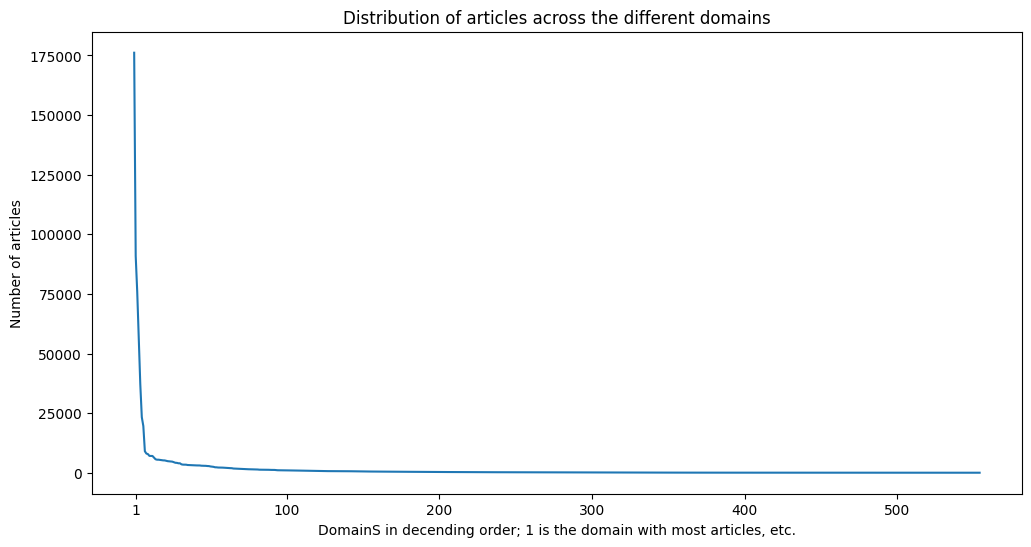

In [10]:
# Plot of the distribution of articles across the different domains
plt.figure(figsize=(12,6))
plt.xlabel('DomainS in decending order; 1 is the domain with most articles, etc.')
plt.ylabel('Number of articles')
plt.title('Distribution of articles across the different domains')
plt.xticks([1,100,200, 300, 400, 500, 600])
plt.plot(counts_domain_df.index, counts_domain_df['counts'])
plt.show()

### Looking into 'type'

In [11]:
print(f"Number of unique values in 'type': {len(set(corpus['type']))}\n")

# Here is the number of news texts for each domain
counts_type = corpus['type'].value_counts()
counts_type_df = counts_type.rename_axis('unique_values').reset_index(name='counts')

print(f"Distribution of articles type:\n{counts_type_df}")

Number of unique values in 'type': 11

Distribution of articles type:
   unique_values  counts
0       reliable  218452
1      political  158061
2           bias  115959
3           fake  104155
4     conspiracy   84069
5          rumor   56366
6     unreliable   34792
7      clickbait   27003
8        junksci   13577
9         satire   13082
10          hate    8742


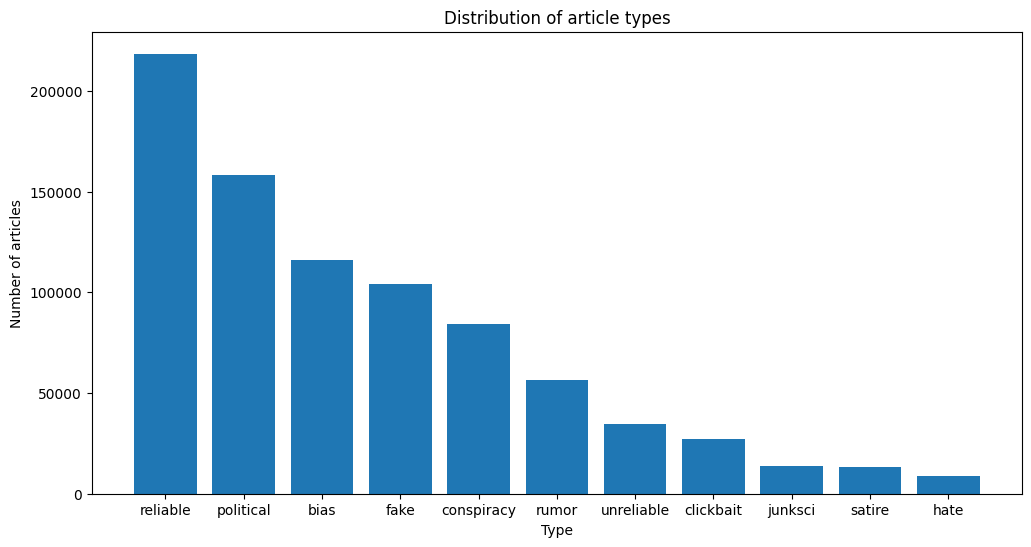

In [12]:
# Plot of the distribution of articles across the different types
plt.figure(figsize=(12,6))
plt.title('Distribution of article types')
plt.xlabel('Type')
plt.ylabel('Number of articles')
plt.bar(counts_type_df['unique_values'], counts_type_df['counts'])
plt.show()

### Looking into 'content'

In [13]:
# Calculate lengths of 'content' strings
corpus['content_length'] = corpus.content.str.len()

In [14]:
content_length = corpus['content_length'].sort_values(ascending=False)
print(f"The articles with most tokens has {content_length.iloc[0]} tokens.")
print(f"The articles with fewest tokens has {content_length.iloc[-1]} tokens.")

The articles with most tokens has 21730 tokens.
The articles with fewest tokens has 2 tokens.


In [15]:
print(f"Only 5,000 articles (or {round(5000/corpus.shape[0] * 100, 2)}% of the articles) has more than {content_length.iloc[5000]} tokens.")

Only 5,000 articles (or 0.6% of the articles) has more than 2653 tokens.


In [16]:
print(f"Only 5,000 articles (or {round((corpus.shape[0]-5000)/corpus.shape[0] * 100, 2)}% of the articles) has {content_length.iloc[-5000]} or less tokens.")

Only 5,000 articles (or 99.4% of the articles) has 7 or less tokens.


In [17]:
print(f"Average tokens per article is {round(content_length.mean(), 2)}")

Average tokens per article is 350.56


In [18]:
print(f"The median token count is {content_length[len(content_length)/2]}")

The median token count is 60


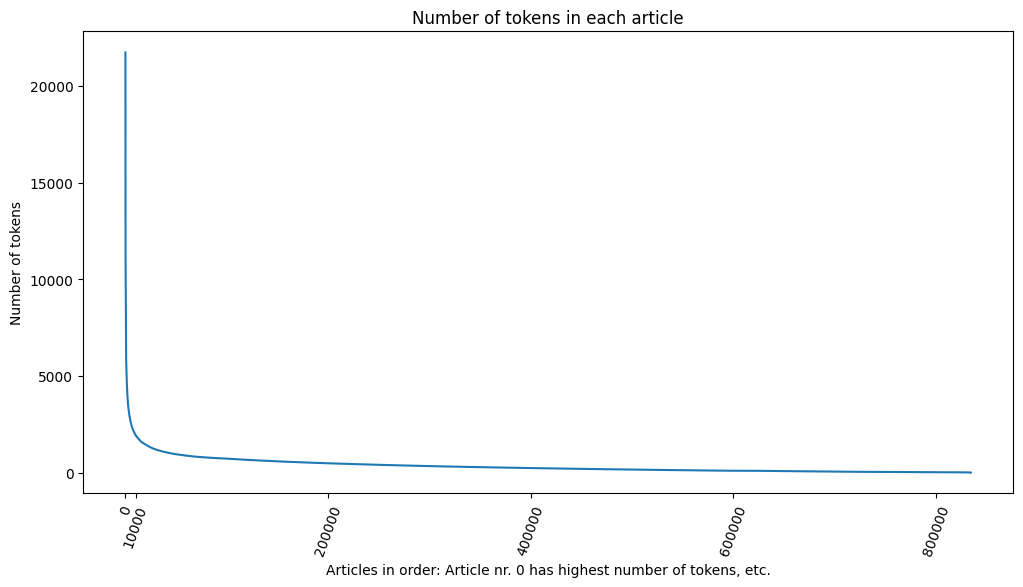

In [19]:
# Plot of the number tokens in each article
plt.figure(figsize=(12,6))
plt.title('Number of tokens in each article')
plt.xlabel('Articles in order: Article nr. 0 has highest number of tokens, etc.')
plt.ylabel('Number of tokens')
plt.xticks([0,10000, 200000,400000, 600000, 800000])
plt.xticks(rotation=70)
plt.plot(corpus.index, corpus['content_length'].sort_values(ascending=False))
plt.show()

In [20]:
# Find average length of articles (token count) for each article type.
types = set(corpus['type'])
types_df = pd.DataFrame(types)
types_df.columns = ['type']
types_df["average_token_count"] = np.nan


for index, row in types_df.iterrows():
    df_temp = corpus.loc[corpus['type'] == row['type']]
    types_df.at[index, 'average_token_count'] = sum(df_temp['content_length'])/df_temp.shape[0]

types_df = types_df.sort_values("average_token_count", ascending=False)


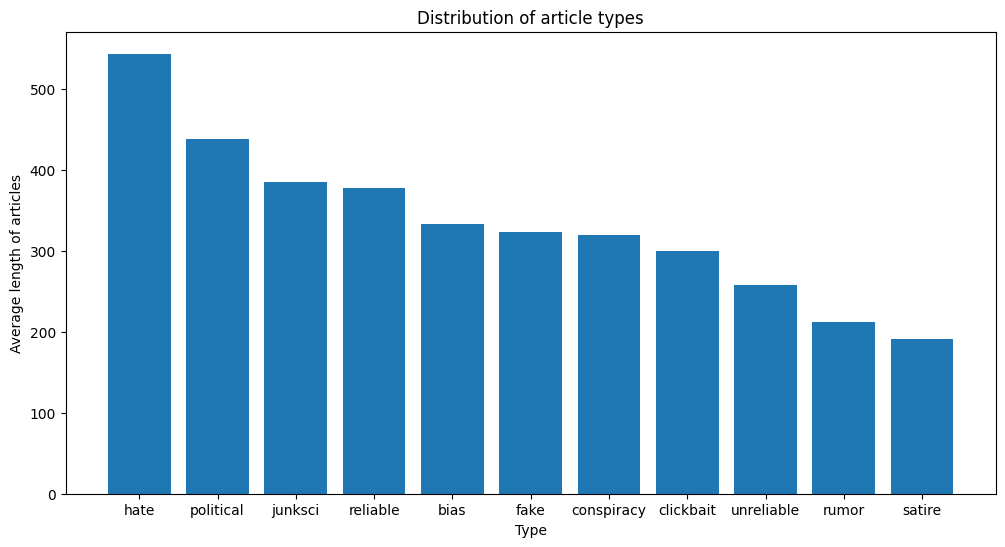

In [21]:
# Plot the average length of articles (the token count) for each article type.
plt.figure(figsize=(12,6))
plt.title('Distribution of article types')
plt.xlabel('Type')
plt.ylabel('Average length of articles')
plt.bar(types_df['type'], types_df['average_token_count'])
plt.show()

# Task 4

### Should we shuffle before split?

#### Lets first try splitting without shuffling first. We sort data by 'scraped_at' before splitting.

In [ ]:
# Sort data based on scrape date.

# Note that 'coerce' results in NaN for entries that can't be converted.
# This throws away many of the article, expecially articles of type 'reliable'.
# Still, this will indicate whether the distribution is somewhat even in 
# in train, validation and test data without shuffling before splitting. 
corpus.scraped_at = pd.to_datetime(corpus.scraped_at,errors='coerce')  
corpus = corpus[corpus.scraped_at.notnull()]

corpus = corpus.sort_values('scraped_at')

In [ ]:
# No shuffling before split
train, valid, test = np.split(corpus, [int(0.8*len(corpus)), int(0.9*len(corpus))])

#### Now lets see the distribution among article types in training, validation and test data.

In [ ]:
# Find the number of news texts for each domain in training data
counts_type = train['type'].value_counts()
counts_type_df = counts_type.rename_axis('unique_values').reset_index(name='counts')

# Plot of the distribution of articles across the different types
plt.figure(figsize=(12,6))
plt.title('Distribution of article types in training data without shuffling before split')
plt.xlabel('Type')
plt.ylabel('Number of articles')
plt.bar(counts_type_df['unique_values'], counts_type_df['counts'])
plt.show()

In [ ]:
# Find the number of news texts for each domain in validation data
counts_type = valid['type'].value_counts()
counts_type_df = counts_type.rename_axis('unique_values').reset_index(name='counts')

# Plot of the distribution of articles across the different types
plt.figure(figsize=(12,6))
plt.title('Distribution of article types in validation data without shuffling before split')
plt.xlabel('Type')
plt.ylabel('Number of articles')
plt.bar(counts_type_df['unique_values'], counts_type_df['counts'])
plt.show()

In [ ]:
# Find the number of news texts for each domain in test data
counts_type = test['type'].value_counts()
counts_type_df = counts_type.rename_axis('unique_values').reset_index(name='counts')

# Plot of the distribution of articles across the different types
plt.figure(figsize=(12,6))
plt.title('Distribution of article types in test data without shuffling before split')
plt.xlabel('Type')
plt.ylabel('Number of articles')
plt.bar(counts_type_df['unique_values'], counts_type_df['counts'])
plt.show()

### Okay, splitting without shuffling seems like a bad idea since distribution of article types is very uneven among train, validation and test. 

In [ ]:
# Shuffling before split
train, valid, test = np.split(corpus.sample(frac=1, random_state=42), [int(0.8*len(corpus)), int(0.9*len(corpus))])

In [ ]:
#train.to_csv('fakenewscorpus_data/15,000_rows_preprocessed_train.csv', index=False)
#valid.to_csv('fakenewscorpus_data/15,000_rows_preprocessed_valid.csv', index=False)
#test.to_csv('fakenewscorpus_data/15,000_rows_preprocessed_test.csv', index=False)
train.to_csv('fakenewscorpus_data/995,000_rows_preprocessed_train.csv', index=False)
valid.to_csv('fakenewscorpus_data/995,000_rows_preprocessed_valid.csv', index=False)
test.to_csv('fakenewscorpus_data/995,000_rows_preprocessed_test.csv', index=False)